<a href="https://colab.research.google.com/github/CharishmaRankireddy/fmml/blob/main/Copy_of_FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

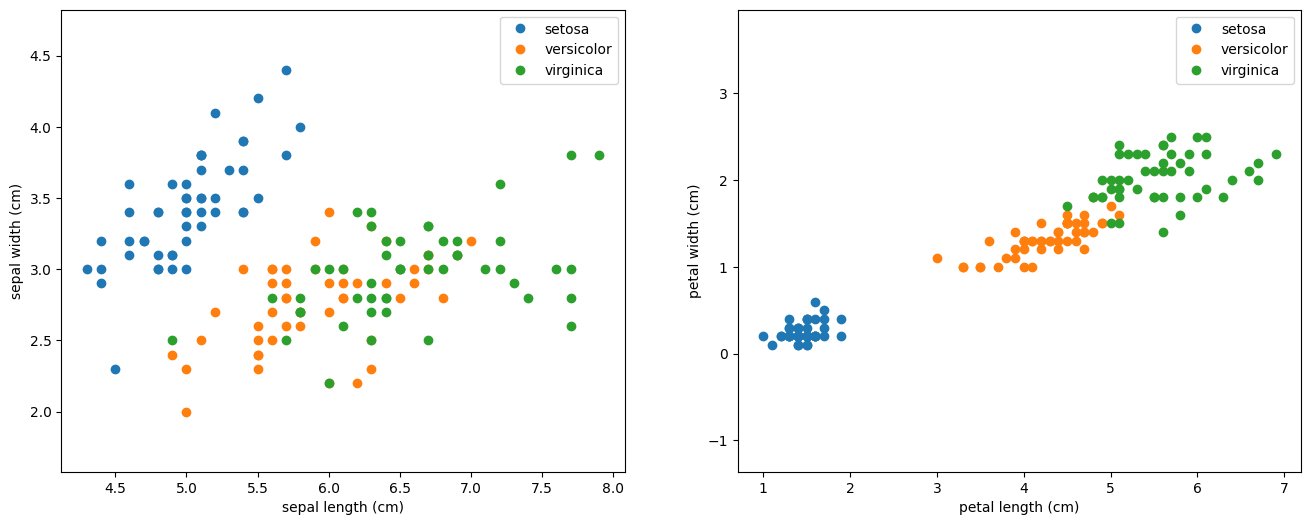

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 175.58it/s]


# Plot training progress

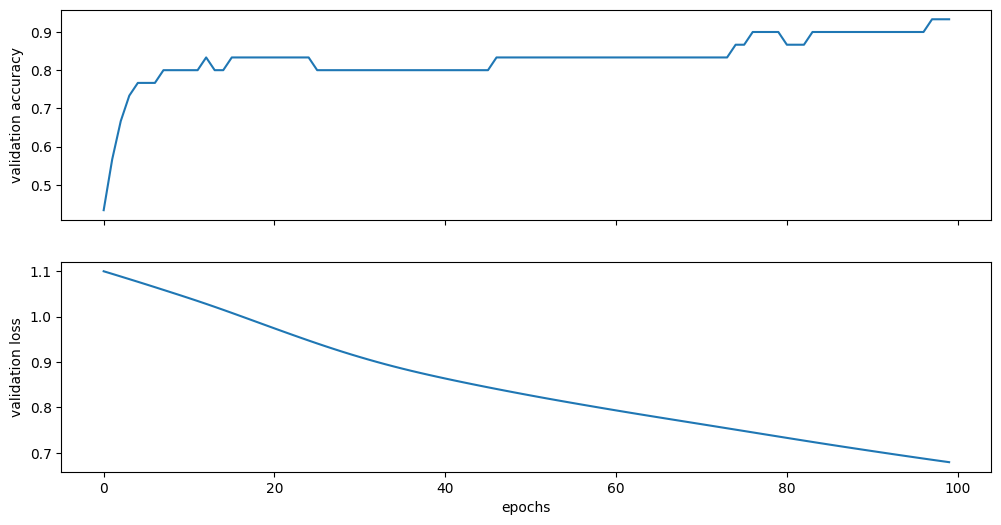

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

# 1st answer

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(NeuralNetwork, self).__init__()

        # Define layers in a list
        layers = []

        # Add input layer and the first hidden layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # Add subsequent hidden layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(nn.ReLU())

        # Add output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Combine all layers into a sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Define the input size, hidden layer sizes, and output size
input_size = 10
hidden_sizes = [32, 64, 32]  # Example of three hidden layers with sizes 32, 64, and 32
output_size = 1

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_sizes, output_size)

# Print the model architecture
print(model)

# Define an optimizer and a loss function (for demonstration)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Example training loop (dummy data and target)
data = torch.randn(10, input_size)
target = torch.randn(10, output_size)

optimizer.zero_grad()
output = model(data)
loss = criterion(output, target)
loss.backward()
optimizer.step()


NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


# 2nd answer

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(NeuralNetwork, self).__init__()

        # Define layers in a list
        layers = []

        # Add input layer and the first hidden layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # Add subsequent hidden layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(nn.ReLU())

        # Add output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Combine all layers into a sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Define the input size, hidden layer sizes, and output size
input_size = 10
hidden_sizes = [64, 128, 64]  # Example of three hidden layers with sizes 64, 128, and 64
output_size = 1

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_sizes, output_size)

# Print the model architecture
print(model)

# Define an optimizer and a loss function (for demonstration)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Example training loop (dummy data and target)
data = torch.randn(10, input_size)
target = torch.randn(10, output_size)

optimizer.zero_grad()
output = model(data)
loss = criterion(output, target)
loss.backward()
optimizer.step()


NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)


# 3rd answer

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation_function):
        super(NeuralNetwork, self).__init__()

        # Define layers in a list
        layers = []

        # Add input layer and the first hidden layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(activation_function())

        # Add subsequent hidden layers
        for i in range(len(hidden_sizes) - 1):
            layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
            layers.append(activation_function())

        # Add output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))

        # Combine all layers into a sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Define the input size, hidden layer sizes, and output size
input_size = 10
hidden_sizes = [64, 128, 64]  # Example of three hidden layers with sizes 64, 128, and 64
output_size = 1

# Choose an activation function (e.g., nn.ReLU, nn.Tanh, nn.Sigmoid, nn.LeakyReLU, nn.ELU, nn.GELU)
activation_function = nn.Tanh

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_sizes, output_size, activation_function)

# Print the model architecture
print(model)

# Define an optimizer and a loss function (for demonstration)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Example training loop (dummy data and target)
data = torch.randn(10, input_size)
target = torch.randn(10, output_size)

optimizer.zero_grad()
output = model(data)
loss = criterion(output, target)
loss.backward()
optimizer.step()


NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)
